In [ ]:
%reset -f


In [ ]:
## 1a) 데이터에 대한 텐서 모양 확인하기

# 교재, 강의노트와 다른 코드를 사용함에 주의
import tensorflow as tf
import tensorflow_datasets as tfds

# 1-1) MNIST 데이터셋 가져오기
Tr, Te = tfds.load(name='mnist', split=['train', 'test'],
                   as_supervised=True, batch_size=-1)

# `tfds.as_numpy`를 사용하여 텐서플로우 데이터셋을 numpy 배열로 변환합니다.
X_train, y_train = tfds.as_numpy(Tr)
X_test, y_test = tfds.as_numpy(Te)

# 텐서 모양 확인
print("The Shape of MNIST: ")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 1-2) CIFAR-10
Tr, Te = tfds.load(name='cifar10', split=['train', 'test'],
                   as_supervised=True, batch_size=-1)

# `tfds.as_numpy`를 사용하여 텐서플로우 데이터셋을 numpy 배열로 변환합니다.
X_train, y_train = tfds.as_numpy(Tr)
X_test, y_test = tfds.as_numpy(Te)

# 텐서 모양 확인
print("\nThe Shape of CIFAR-10: ")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
The Shape of MNIST: 
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteD4CBFR/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteD4CBFR/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.

The Shape of CIFAR-10: 
(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [ ]:
## 1b) 데이터에 대한 텐서 모양 확인하기
# 교재, 강의노트와 같은 코드를 사용

from keras.datasets import boston_housing, reuters

# 1-3) Boston Housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# 텐서 모양 확인
print("\nThe Shape of Boston Housing: ")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 1-4) Reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

# 텐서 모양 확인
print("\nThe Shape of Reuters: ")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


57026/57026 [==============================] - 0s 0us/step

The Shape of Boston Housing: 
(404, 13)
(404,)
(102, 13)
(102,)
2110848/2110848 [==============================] - 0s 0us/step

The Shape of Reuters: 
(8982,)
(8982,)
(2246,)
(2246,)


In [ ]:
## 2-1) MNIST에 대한 MLP 학습 준비

import numpy as np
import tensorflow as tf
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# MNIST 데이터 가져오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Raw MNIST Data: ")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
  # Training Set에는 28 x 28 이미지가 60,000개
  # Test Set에는 28 x 28 이미지가 10,000개

# MLP에서 이용가능한 형태로 가공하기: 60,000 x (28 x 28)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print("\nFlatten MNIST Data: ")
print(X_train.shape)
print(X_test.shape)

# ndarray로 변환하여 [0, 1] 구간으로 이동시키기
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print("\nNormalized MNIST Data: ")
print(X_train[0, :])
print(X_test[0, :])

# y 레이블을 원핫 코드로 변환하기
print(y_train[0])
print(y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print("\nOne-Hot Encoded MNIST Data: ")
print(y_train[0, :])
print(y_test[0, :])



Raw MNIST Data: 
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

Flatten MNIST Data: 
(60000, 784)
(10000, 784)

Normalized MNIST Data: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         

In [ ]:
## 2-2) 2-1에 이어 신경망 설계

# 신경망 설계
n_input = X_train.shape[1]    # 784 (= 28 x 28)개
n_hidden = [128]              # 은닉층의 뉴런 수
                              # 여러개일 수 있으므로 배열로 표현
n_output = 10

mlp_model = Sequential()      # 신경망 모델 생성
mlp_model.add(Dense(units=n_hidden[0], activation='tanh',
                    input_shape=(n_input,),
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_output, activation='tanh',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))

mlp_model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
mlp_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## 2-3) 2-2에 이어 신경망 학습

# 신경망 학습 및 히스토리 보존
hist = mlp_model.fit(X_train, y_train, epochs=30, batch_size=128,
                     validation_data=(X_test, y_test), verbose=2)

res = mlp_model.evaluate(X_test, y_test, verbose=0)
print("[Err, Acc] = : ", res)


Epoch 1/30
469/469 - 2s - loss: 0.0333 - accuracy: 0.8774 - val_loss: 0.0205 - val_accuracy: 0.9295 - 2s/epoch - 5ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0177 - accuracy: 0.9346 - val_loss: 0.0151 - val_accuracy: 0.9440 - 2s/epoch - 3ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0141 - accuracy: 0.9488 - val_loss: 0.0133 - val_accuracy: 0.9517 - 2s/epoch - 3ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0123 - accuracy: 0.9563 - val_loss: 0.0120 - val_accuracy: 0.9575 - 2s/epoch - 3ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0111 - accuracy: 0.9612 - val_loss: 0.0111 - val_accuracy: 0.9600 - 2s/epoch - 3ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0103 - accuracy: 0.9648 - val_loss: 0.0108 - val_accuracy: 0.9621 - 2s/epoch - 3ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0097 - accuracy: 0.9677 - val_loss: 0.0102 - val_accuracy: 0.9634 - 2s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0092 - accuracy: 0.9696 - val_loss: 0.0099 - val_accuracy: 0.9644 - 2s/epoch - 3ms/step
Epoch 9/30
469/469 - 2s 

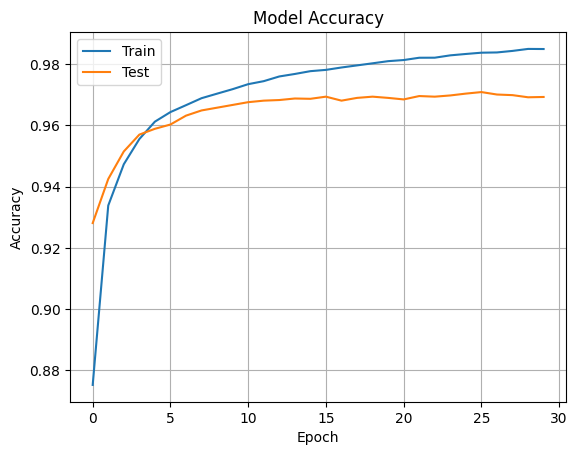

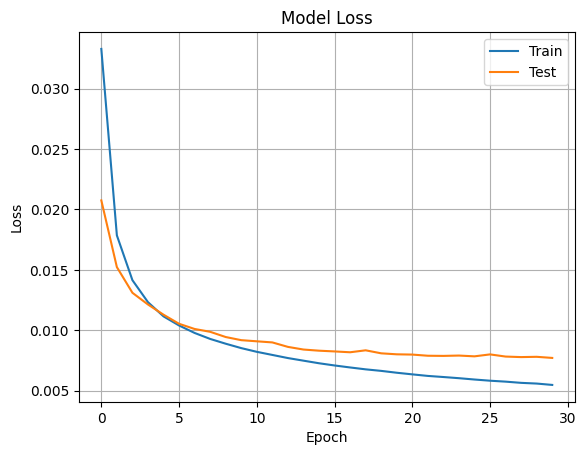

In [ ]:
## 2-4) 2-3에 이어 Training Progress 플로팅 하기

import matplotlib.pyplot as plt

# Accuracy Traning Curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Loss Curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel( 'Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()


4422102/4422102 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
469/469 - 2s - loss: 0.0366 - accuracy: 0.7984 - val_loss: 0.0307 - val_accuracy: 0.8276 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0271 - accuracy: 0.8450 - val_loss: 0.0267 - val_accuracy: 0.8404 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0243 - accuracy: 0.8603 - val_loss: 0.0248 - val_accuracy: 0.8534 - 1

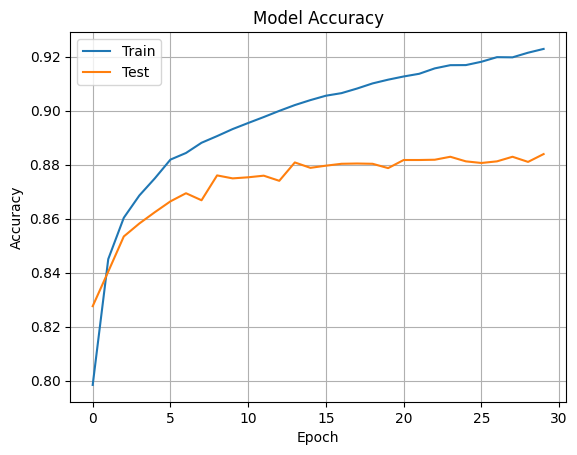

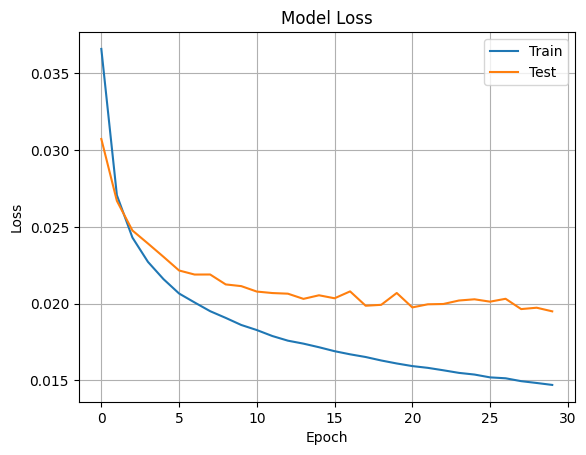

In [ ]:
## 3) Fashion MNIST에 대해 2의 전체 과정과 동일하게 진행하기
%reset -f

import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

# fashion MNIST 데이터 가져와서 가공하기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # 아래의 모든 코드는 복사 붙여넣기 하면 된다

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 설계
n_input = X_train.shape[1]    # 784 (= 28 x 28)개
n_hidden = [128]              # 은닉층의 뉴런 수
                              # 여러개일 수 있으므로 배열로 표현
n_output = 10

mlp_model = Sequential()      # 신경망 모델 생성
mlp_model.add(Dense(units=n_hidden[0], activation='tanh', input_shape=(n_input,),
                    kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp_model.add(Dense(units=n_output, activation='tanh',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
mlp_model.summary()

# 신경망 학습 및 히스토리 보존
hist = mlp_model.fit(X_train, y_train, epochs=30, batch_size=128,
                     validation_data=(X_test, y_test), verbose=2)

res = mlp_model.evaluate(X_test, y_test, verbose=0)
print("[Err, Acc] = : ", res)

# Accuracy Traning Curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Loss Curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel( 'Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

## 트레이닝 커브를 보고 어떠한 상황에 처해있는지 생각해보자


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              803840    
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1859082 (7.09 MB)
Trainable params: 1859082 (7.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
469/4

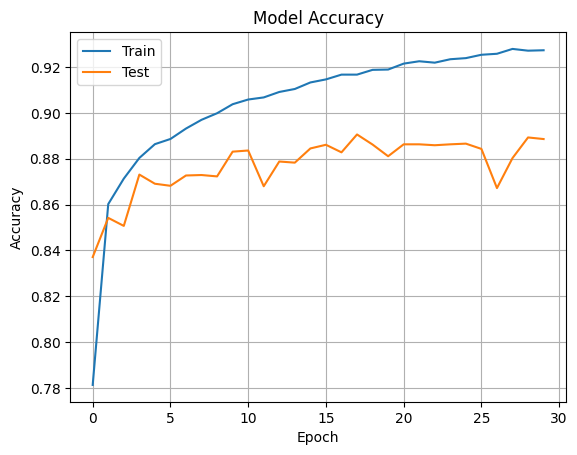

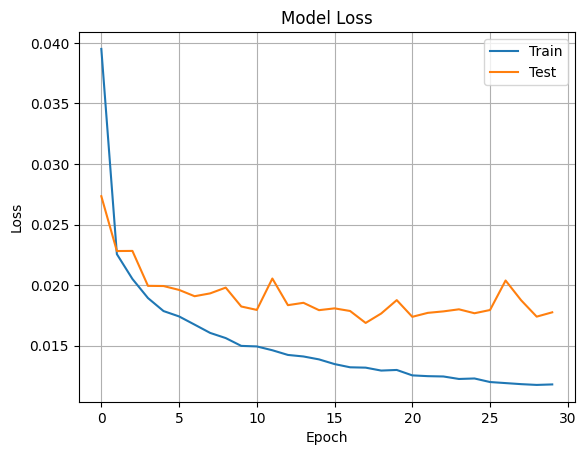

In [ ]:
## 4-1) ANN to DNN: 더 깊은 패턴 인식력을 갖는 딥 신경망
  # 먼저 3의 코드를 복사 붙여넣기 하고 층만 깊게 하자
%reset -f

import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

# fashion MNIST 데이터 가져와서 가공하기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # 아래의 모든 코드는 복사 붙여넣기 하고 신경망 설정만 수정

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 설계
n_input = X_train.shape[1]    # 784 (= 28 x 28)개
n_hidden = [1024, 512, 512, 512]              # 은닉층의 뉴런 수
n_output = 10

mlp_model = Sequential()      # 신경망 모델 생성

mlp_model.add(Dense(units=n_hidden[0], activation='tanh',
                    input_shape=(n_input,),
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_hidden[1], activation='tanh',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_hidden[2], activation='tanh',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_hidden[3],
                    activation='tanh',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_output,
                    activation='tanh',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))

mlp_model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
mlp_model.summary()

# 신경망 학습 및 히스토리 보존
hist = mlp_model.fit(X_train, y_train, epochs=30, batch_size=128,
                     validation_data=(X_test, y_test), verbose=1)  #verb = 1
        # 이번에는 verbose를 1로 설정하여 epoch의 프로그레스를 관찰하자

res = mlp_model.evaluate(X_test, y_test, verbose=0)
print("[Err, Acc] = : ", res)

# Accuracy Traning Curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Loss Curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel( 'Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

## 트레이닝 커브를 보고 앞에 비해 어떠한 상황이 되는지 생각해보자


4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              1607680   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 4364554 (16.65 MB)
Trainable params: 4364554 (16.65 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

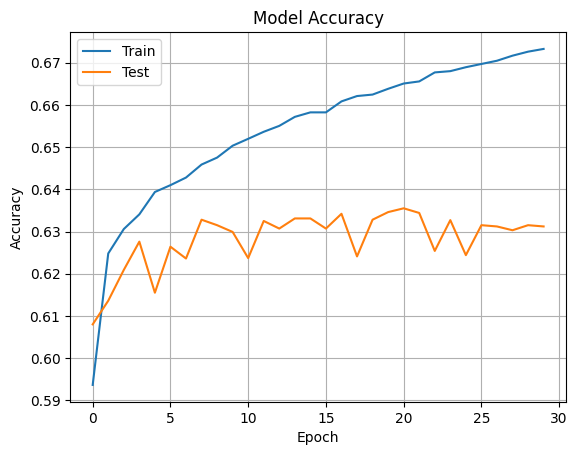

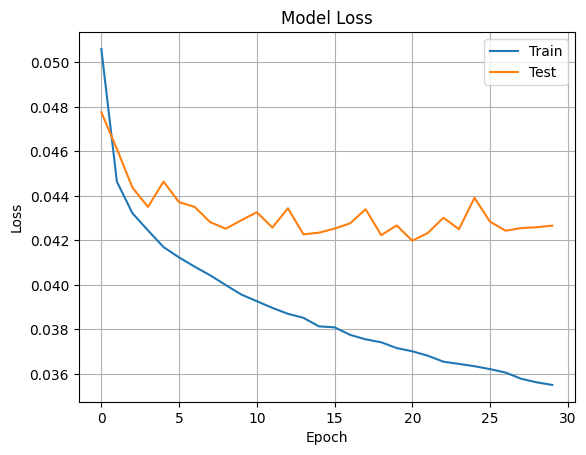

In [ ]:
## 4-2) ANN to DNN: 더 깊은 패턴 인식력을 갖는 딥 신경망
  # 4-1의 코드를 복사 붙여넣기 하고 Loss Function을 Cross Entropy로 수정하자
%reset -f

import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

# fashion MNIST 데이터 가져와서 가공하기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # 아래의 모든 코드는 복사 붙여넣기 하면 된다

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 설계
n_input = X_train.shape[1]    # 784 (= 28 x 28)개
n_hidden = [2048, 1024, 512, 256]              # 은닉층의 뉴런 수
n_output = 10

mlp_model = Sequential()      # 신경망 모델 생성

mlp_model.add(Dense(units=n_hidden[0], activation='relu',
                    input_shape=(n_input,),
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_hidden[1], activation='relu',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_hidden[2], activation='relu',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_hidden[3], activation='relu',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_output, activation='relu',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))

mlp_model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
mlp_model.summary()

# 신경망 학습 및 히스토리 보존
hist = mlp_model.fit(X_train, y_train, epochs=30, batch_size=128,
                     validation_data=(X_test, y_test), verbose=1)  #verb = 1
        # 이번에는 verbose를 1로 설정하여 epoch의 프로그레스를 관찰하자

res = mlp_model.evaluate(X_test, y_test, verbose=0)
print("[Err, Acc] = : ", res)

# Accuracy Traning Curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Loss Curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel( 'Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

## 트레이닝 커브를 보고 앞에 비해 어떠한 상황이 되는지 생각해보자
